In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'Z:\\Sasindu\\Data set\\Heart Disease\\heart.csv'
data = pd.read_csv(path)
df = pd.DataFrame(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
for col in df.columns:
    print(col,'---->',df[col].nunique())

age ----> 41
sex ----> 2
cp ----> 4
trestbps ----> 49
chol ----> 152
fbs ----> 2
restecg ----> 3
thalach ----> 91
exang ----> 2
oldpeak ----> 40
slope ----> 3
ca ----> 5
thal ----> 4
target ----> 2


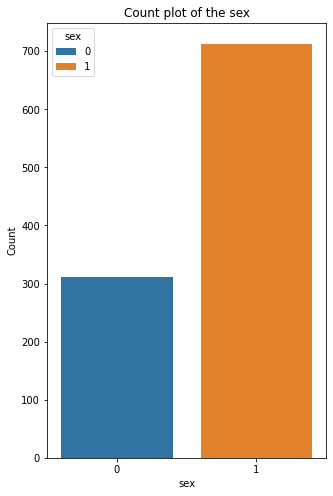

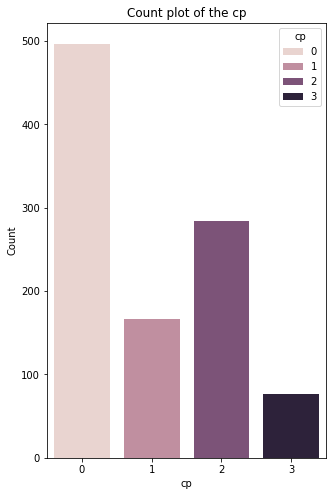

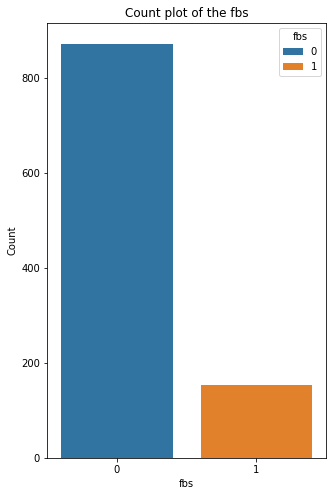

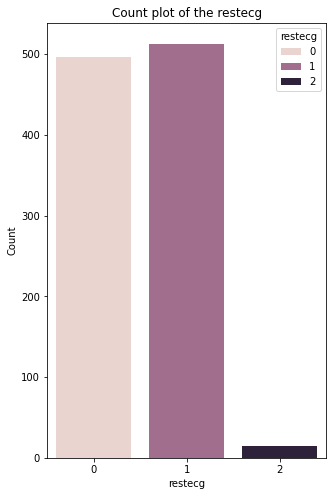

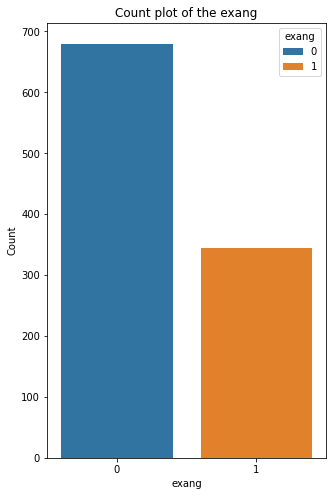

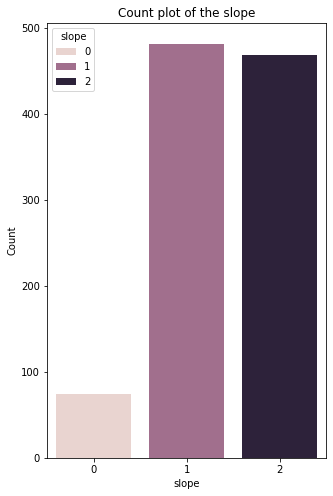

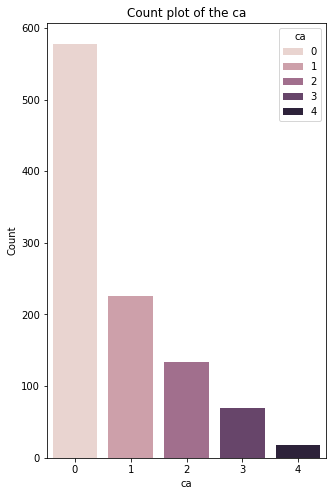

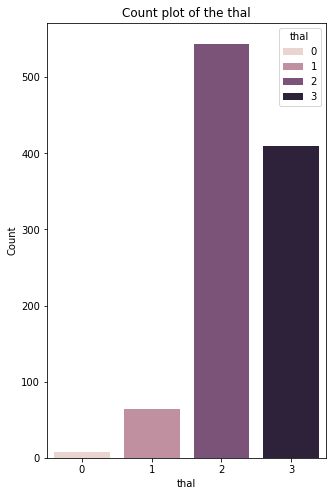

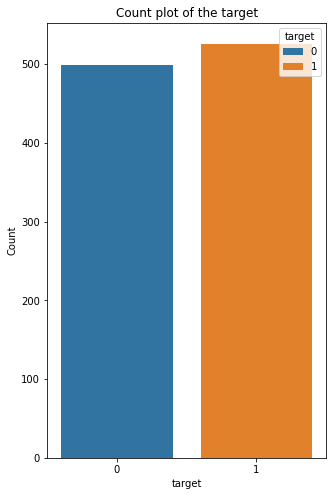

In [14]:
category_col = ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']

for column in category_col:
    plt.figure(figsize=(5,8))
    sns.countplot(data = df, x = column , hue = column)
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    plt.title(f'Count plot of the {column}')
    plt.show()

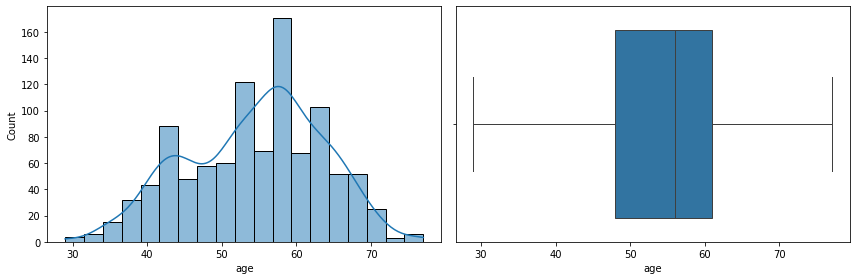

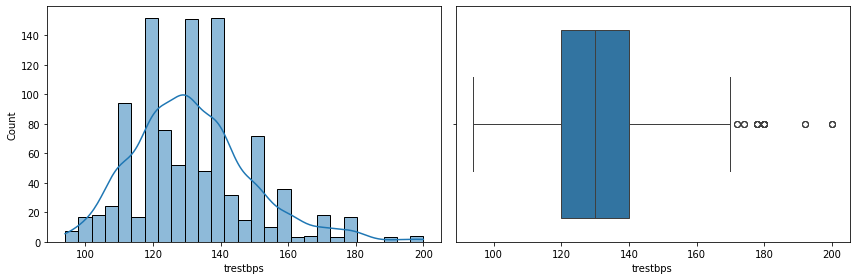

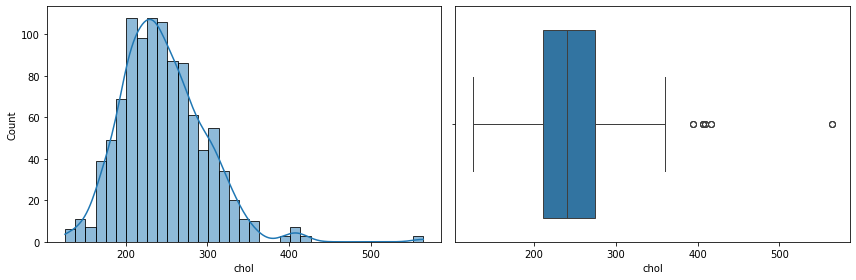

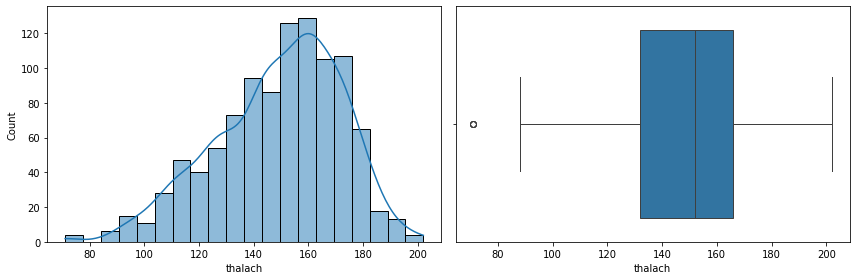

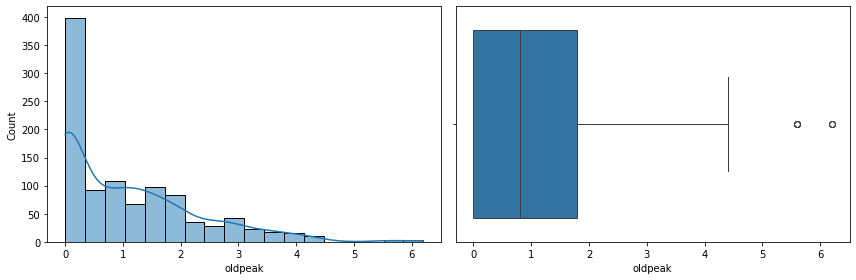

In [15]:
numeric_col = ['age','trestbps','chol','thalach','oldpeak']

for col in numeric_col:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.tight_layout()
    plt.show()

In [16]:
x = df.drop(columns= ['target'],axis =1).values
y = df['target'].values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
mm = MinMaxScaler()
x_train_scaled = mm.fit_transform(x_train)
x_test_scaled = mm.transform(x_test)

In [27]:
def model_acc(model):
    model.fit(x_train_scaled,y_train)
    acc = model.score(x_test_scaled, y_test)
    print(str(model)+'-->'+str(acc))

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model_acc(dt)

DecisionTreeClassifier()-->1.0


In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_acc(rf)

RandomForestClassifier()-->1.0


In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
models = [
    ('Decision Tree', dt),
    ('Random Forest', rf)
]

for model_name, model in models:
    
    model.fit(x_train_scaled,y_train)
    
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)
    
    train_accuracy = accuracy_score(y_train,y_train_pred)
    test_accuracy = accuracy_score(y_test,y_test_pred)
    conf_matrix = confusion_matrix(y_test,y_test_pred)
    class_report = classification_report(y_test, y_test_pred)
    
    print(model_name)
    print('Train_accuracy :',train_accuracy)
    print('Test_accuracy :\n',test_accuracy)
    print('Confusion_matrix :\n',conf_matrix)
    print('Classification_report :\n',class_report)

Decision Tree
Train_accuracy : 1.0
Test_accuracy :
 1.0
Confusion_matrix :
 [[139   0]
 [  0 118]]
Classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       118

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257

Random Forest
Train_accuracy : 1.0
Test_accuracy :
 1.0
Confusion_matrix :
 [[139   0]
 [  0 118]]
Classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       118

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257

